In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm

import sklearn.metrics as metrics

In [27]:
df = pd.read_csv("football_players_dataset_traits_processed.csv", index_col=0)
df.head()

short_name                            full_name  age dateOfBirth  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   28  1993-01-07   
3       K. De Bruyne                      Kevin De Bruyne   29  1991-06-28   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height  weight           positions                 club  \
0     170      72  ['RW', 'ST', 'CF']         FC Barcelona   
1     188      83        ['ST', 'LW']             Juventus   
2     188      87              ['GK']      Atlético Madrid   
3     180      70       ['CM', 'CAM']      Manchester City   
4     175      68       ['LW', 'CAM']  Paris Saint-Germain   

   contract_valid_until  overall_rating  ...  CAM  CM  CDM LB  CB  RB  GK  \
0                  2021              93  ...    0   0    0  0   0   0   0   
1                  2022              92  ...    0   0    0  0   0   0   0   
2                  2023              91  ...    0   0    0  0   0   0   1   
3                  2023              91  ...    1   1    0  0   0   0   0   
4                  2022              91  ...    1   0    0  0   0   0   0   

  years_left_on_contract  att_work_rate  def_work_rate  
0                      0         Medium            Low  
1                      1           High            Low  
2                      2         Medium         Medium  
3                      2           High           High  
4                      1           High         Medium  

[5 rows x 66 columns]

In [28]:
df.columns.to_list()

['short_name',
 'full_name',
 'age',
 'dateOfBirth',
 'height',
 'weight',
 'positions',
 'club',
 'contract_valid_until',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'prefered_foot',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'work_rate',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK'

In [29]:
df["rep_inter"].head()

0    5
1    5
2    3
3    4
4    5
Name: rep_inter, dtype: int64

In [30]:
df_dummies = pd.get_dummies(df[["prefered_foot", "att_work_rate", "def_work_rate"]])

In [31]:
df_dummies.head()

prefered_foot_Left  prefered_foot_Right  att_work_rate_High  \
0                   1                    0                   0   
1                   0                    1                   1   
2                   0                    1                   0   
3                   0                    1                   1   
4                   0                    1                   1   

   att_work_rate_Low  att_work_rate_Medium  def_work_rate_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  0                     0                   1   
4                  0                     0                   0   

   def_work_rate_Low  def_work_rate_Medium  
0                  1                     0  
1                  1                     0  
2                  0                     1  
3                  0                     0  
4                  0                     1

In [32]:
df = df.join(df_dummies)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [34]:
df.columns.to_list()

['short_name',
 'full_name',
 'age',
 'dateOfBirth',
 'height',
 'weight',
 'positions',
 'club',
 'contract_valid_until',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'prefered_foot',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'work_rate',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK'

In [35]:
final_df = df.drop(columns=["full_name", "dateOfBirth", "positions", "contract_valid_until", "prefered_foot", "work_rate", "att_work_rate", "def_work_rate"])
print(final_df.drop(columns=["short_name", "value", "club"]).shape)
calculate_vif_(final_df.drop(columns=["short_name", "value", "club"]), thresh=5.0)
print(final_df.drop(columns=["short_name", "value", "club"]).shape)

(18615, 63)


C:\Users\pault\anaconda3\envs\dev\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'prefered_foot_Left' at index: 55
dropping 'att_work_rate_High' at index: 56
dropping 'def_work_rate_Medium' at index: 60
dropping 'overall_rating' at index: 3
dropping 'height' at index: 1
dropping 'potential' at index: 2
dropping 'skill_ball_control' at index: 16
dropping 'atk_short_passing' at index: 10
dropping 'mvmt_acceleration' at index: 15
dropping 'def_standing_tackle' at index: 31
dropping 'mvmt_reactions' at index: 17
dropping 'weight' at index: 1
dropping 'skill_dribbling' at index: 10
dropping 'mvmt_agility' at index: 14
dropping 'pow_shot_power' at index: 15
dropping 'ment_positioning' at index: 21
dropping 'ment_composure' at index: 23
dropping 'atk_finishing' at index: 7
dropping 'def_sliding_tackle' at index: 23
dropping 'ment_vision' at index: 20
dropping 'pow_stamina' at index: 15
dropping 'atk_heading_accuracy' at index: 7
dropping 'atk_crossing' at index: 6
dropping 'mvmt_sprint_speed' at index: 10
dropping 'skill_long_passing' at index: 9
dropping 'ment_i

In [36]:
final_df = final_df[['wage', 'release_clause', 'club', 'ST', 'LW', 'RW', 'CAM', 'CM', 'CDM', 'LB',
       'CB', 'RB', 'GK', 'years_left_on_contract', 'prefered_foot_Right',
       'att_work_rate_Low', 'att_work_rate_Medium', 'def_work_rate_High',
       'def_work_rate_Low', 'value']]

df_club_dummies = pd.get_dummies(final_df["club"])
final_df = final_df.join(df_club_dummies)
final_df = final_df.drop(columns=["club"])

In [37]:
final_df.columns.to_list()

['wage',
 'release_clause',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK',
 'years_left_on_contract',
 'prefered_foot_Right',
 'att_work_rate_Low',
 'att_work_rate_Medium',
 'def_work_rate_High',
 'def_work_rate_Low',
 'value',
 '1. FC Heidenheim 1846',
 '1. FC Kaiserslautern',
 '1. FC Köln',
 '1. FC Magdeburg',
 '1. FC Nürnberg',
 '1. FC Saarbrücken',
 '1. FC Union Berlin',
 '1. FSV Mainz 05',
 'AC Ajaccio',
 'AC Horsens',
 'AC Mineros de Guayana',
 'AC Monza',
 'AD Alcorcón',
 'ADO Den Haag',
 'AEK Athens',
 'AFC Wimbledon',
 'AIK',
 'AJ Auxerre',
 'AS Monaco',
 'AS Nancy Lorraine',
 'AS Saint-Étienne',
 'AZ Alkmaar',
 'Aalborg BK',
 'Aalesunds FK',
 'Aarhus GF',
 'Aberdeen',
 'Abha Club',
 'Academica Clinceni',
 'Accrington Stanley',
 'Adelaide United',
 'Ajax',
 'Al Ahli',
 'Al Ain',
 'Al Ain FC',
 'Al Batin',
 'Al Faisaly',
 'Al Fateh',
 'Al Hilal',
 'Al Ittihad',
 'Al Nassr',
 'Al Qadisiyah',
 'Al Raed',
 'Al Shabab',
 'Al Taawoun',
 'Al Wehda',
 'Alanyas

# Première prédiction

In [38]:
X = final_df.drop(columns=["value"])
y = final_df["value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
X_train.shape

(12472, 699)

In [41]:
pipeline = Pipeline([('scaler', StandardScaler()), ('EN', lm.ElasticNet())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('EN', ElasticNet())])

In [42]:
y_pred = pipeline.predict(X_test)

In [43]:
metrics.mean_squared_error(y_test, y_pred, squared=False)

2518820.9165967978

In [44]:
metrics.r2_score(y_test, y_pred)

0.8933955380934261

In [45]:
X_test.shape, y_test.shape, y_pred.shape

((6143, 699), (6143,), (6143,))

In [48]:
coefs = pipeline.named_steps['EN'].coef_

columns = X_train.columns.to_list()

len(coefs), len(columns)

d = {'column': columns, 'coef': coefs}

coefficients = pd.DataFrame(data=d)
coefficients["abs_coef"] = abs(coefficients["coef"])
coefficients = coefficients.sort_values(by=['abs_coef'], ascending=False)
coefficients.head(60)

column          coef      abs_coef
1              release_clause  3.618907e+06  3.618907e+06
0                        wage  1.935508e+06  1.935508e+06
469       Paris Saint-Germain  3.701531e+05  3.701531e+05
234         FC Bayern München  3.391854e+05  3.391854e+05
357                  Juventus  2.619973e+05  2.619973e+05
109         Borussia Dortmund  2.198632e+05  2.198632e+05
392                 Liverpool  2.109972e+05  2.109972e+05
48                       Ajax  2.061957e+05  2.061957e+05
630         Tottenham Hotspur  1.928940e+05  1.928940e+05
432                    Napoli  1.906209e+05  1.906209e+05
82            Atlético Madrid  1.896538e+05  1.896538e+05
12     years_left_on_contract  1.705407e+05  1.705407e+05
492                RB Leipzig  1.666519e+05  1.666519e+05
405         Manchester United  1.604544e+05  1.604544e+05
15       att_work_rate_Medium -1.515480e+05  1.515480e+05
404           Manchester City  1.513033e+05  1.513033e+05
149                   Chelsea  1.415948e+05  1.415948e+05
348                     Inter  1.358716e+05  1.358716e+05
464                       PSV  1.277673e+05  1.277673e+05
77                   Atalanta  1.226230e+05  1.226230e+05
572                Sevilla FC  1.208484e+05  1.208484e+05
110  Borussia Mönchengladbach  1.104725e+05  1.104725e+05
413                     Milan  9.824325e+04  9.824325e+04
78    Athletic Club de Bilbao  9.241219e+04  9.241219e+04
95        Bayer 04 Leverkusen  9.133298e+04  9.133298e+04
294                    Fulham -9.045874e+04  9.045874e+04
543                SL Benfica  8.958315e+04  8.958315e+04
599               Sporting CP  8.748988e+04  8.748988e+04
16         def_work_rate_High  8.219639e+04  8.219639e+04
507               Real Madrid  7.792203e+04  7.792203e+04
14          att_work_rate_Low -7.787218e+04  7.787218e+04
665             Villarreal CF  7.688689e+04  7.688689e+04
510             Real Sociedad  7.649965e+04  7.649965e+04
258                  FC Porto  7.500215e+04  7.500215e+04
379                LOSC Lille  7.278821e+04  7.278821e+04
39                 AZ Alkmaar  7.265184e+04  7.265184e+04
386              Leeds United -7.135254e+04  7.135254e+04
506                Real Betis  7.102189e+04  7.102189e+04
678      West Bromwich Albion -7.040452e+04  7.040452e+04
295            Galatasaray SK -6.558549e+04  6.558549e+04
5                         CAM  6.498544e+04  6.498544e+04
302                 Getafe CF  6.397536e+04  6.397536e+04
573          Shakhtar Donetsk  6.178409e+04  6.178409e+04
661             VfL Wolfsburg  6.001721e+04  6.001721e+04
73                    Arsenal  5.924785e+04  5.924785e+04
445                  OGC Nice  5.888384e+04  5.888384e+04
443         Nottingham Forest -5.849862e+04  5.849862e+04
527                  SC Braga  5.763411e+04  5.763411e+04
679           West Ham United  5.558487e+04  5.558487e+04
3                          LW  5.510881e+04  5.510881e+04
283             Fenerbahçe SK -5.329394e+04  5.329394e+04
495              RCD Espanyol  5.256703e+04  5.256703e+04
169            Club Brugge KV  5.034094e+04  5.034094e+04
332                Hertha BSC  4.980534e+04  4.980534e+04
215               Dynamo Kyiv  4.928141e+04  4.928141e+04
189                 Cruz Azul -4.888522e+04  4.888522e+04
218       Eintracht Frankfurt  4.789530e+04  4.789530e+04
309                Granada CF  4.735280e+04  4.735280e+04
503                Rangers FC -4.602699e+04  4.602699e+04
118              Bristol City -4.573322e+04  4.573322e+04

In [54]:
X_train[X_train["Paris Saint-Germain"]==1]

wage  release_clause  ST  LW  RW  CAM  CM  CDM  LB  CB  ...  \
9672      750.0       5000000.0   0   0   0    0   0    0   1   1  ...   
7017    19000.0       1800000.0   0   0   0    0   0    0   0   0  ...   
146     82000.0      95300000.0   0   0   0    0   0    0   0   1  ...   
76     115000.0     127100000.0   0   0   0    0   0    1   0   1  ...   
78     135000.0     121300000.0   1   0   0    0   0    0   0   0  ...   
12246    2000.0       3700000.0   0   1   0    1   1    0   0   0  ...   
1074    52000.0      27900000.0   0   0   0    0   0    0   0   1  ...   
10295    2000.0       5400000.0   0   0   0    0   1    0   0   0  ...   
738     56000.0      34700000.0   0   0   0    0   0    0   1   1  ...   
4      270000.0     244200000.0   0   1   0    1   0    0   0   0  ...   
336     61000.0            84.0   0   0   0    0   0    0   0   0  ...   
641     78000.0      31500000.0   0   0   0    0   1    1   0   0  ...   
186     95000.0      56400000.0   0   0   0    0   1    1   0   0  ...   
347    100000.0      48100000.0   0   0   1    1   0    0   0   0  ...   
52     135000.0     133200000.0   0   0   0    0   1    1   0   0  ...   
243     20000.0            84.0   0   0   0    0   1    1   0   1  ...   
611     78000.0      44300000.0   0   0   0    0   1    1   0   0  ...   
6      160000.0     357100000.0   1   1   1    0   0    0   0   0  ...   

       Wycombe Wanderers  Yeni Malatyaspor  Yokohama F. Marinos  Yokohama FC  \
9672                   0                 0                    0            0   
7017                   0                 0                    0            0   
146                    0                 0                    0            0   
76                     0                 0                    0            0   
78                     0                 0                    0            0   
12246                  0                 0                    0            0   
1074                   0                 0                    0            0   
10295                  0                 0                    0            0   
738                    0                 0                    0            0   
4                      0                 0                    0            0   
336                    0                 0                    0            0   
641                    0                 0                    0            0   
186                    0                 0                    0            0   
347                    0                 0                    0            0   
52                     0                 0                    0            0   
243                    0                 0                    0            0   
611                    0                 0                    0            0   
6                      0                 0                    0            0   

       Zagłębie Lubin  Zamora FC  Çaykur Rizespor  Örebro SK  Östersunds FK  \
9672                0          0                0          0              0   
7017                0          0                0          0              0   
146                 0          0                0          0              0   
76                  0          0                0          0              0   
78                  0          0                0          0              0   
12246               0          0                0          0              0   
1074                0          0                0          0              0   
10295               0          0                0          0              0   
738                 0          0                0          0              0   
4                   0          0                0          0              0   
336                 0          0                0          0              0   
641                 0          0                0          0              0   
186                 0          0                0       

In [50]:
final_df["predicted_value"] = pipeline.predict(final_df.drop(columns=["value"]))

In [52]:
final_df["short_name"] = df["short_name"]
final_df.head(10)

wage  release_clause  ST  LW  RW  CAM  CM  CDM  LB  CB  ...  \
0  560000.0     212200000.0   1   0   1    0   0    0   0   0  ...   
1  220000.0     104000000.0   1   1   0    0   0    0   0   0  ...   
2  125000.0     255000000.0   0   0   0    0   0    0   0   0  ...   
3  370000.0     235900000.0   0   0   0    1   1    0   0   0  ...   
4  270000.0     244200000.0   0   1   0    1   0    0   0   0  ...   
5  240000.0     183200000.0   1   0   0    0   0    0   0   0  ...   
6  160000.0     357100000.0   1   1   1    0   0    0   0   0  ...   
7  160000.0     196400000.0   0   0   0    0   0    0   0   0  ...   
8  250000.0     222900000.0   0   0   1    0   0    0   0   0  ...   
9  250000.0     222900000.0   0   1   0    0   0    0   0   0  ...   

   Yokohama F. Marinos  Yokohama FC  Zagłębie Lubin  Zamora FC  \
0                    0            0               0          0   
1                    0            0               0          0   
2                    0            0               0          0   
3                    0            0               0          0   
4                    0            0               0          0   
5                    0            0               0          0   
6                    0            0               0          0   
7                    0            0               0          0   
8                    0            0               0          0   
9                    0            0               0          0   

   Çaykur Rizespor  Örebro SK  Östersunds FK  Śląsk Wrocław  predicted_value  \
0                0          0              0              0     1.098180e+08   
1                0          0              0              0     5.510919e+07   
2                0          0              0              0     7.940238e+07   
3                0          0              0              0     9.960180e+07   
4                0          0              0              0     9.758803e+07   
5                0          0              0              0     7.961574e+07   
6                0          0              0              0     1.138549e+08   
7                0          0              0              0     7.008421e+07   
8                0          0              0              0     8.596958e+07   
9                0          0              0              0     8.598272e+07   

          short_name  
0           L. Messi  
1  Cristiano Ronaldo  
2           J. Oblak  
3       K. De Bruyne  
4          Neymar Jr  
5     R. Lewandowski  
6          K. Mbappé  
7            Alisson  
8           M. Salah  
9            S. Mané  

[10 rows x 702 columns]

In [57]:
final_df[final_df["short_name"]== "M. Maignan"]

227    34500000.0
Name: value, dtype: float64

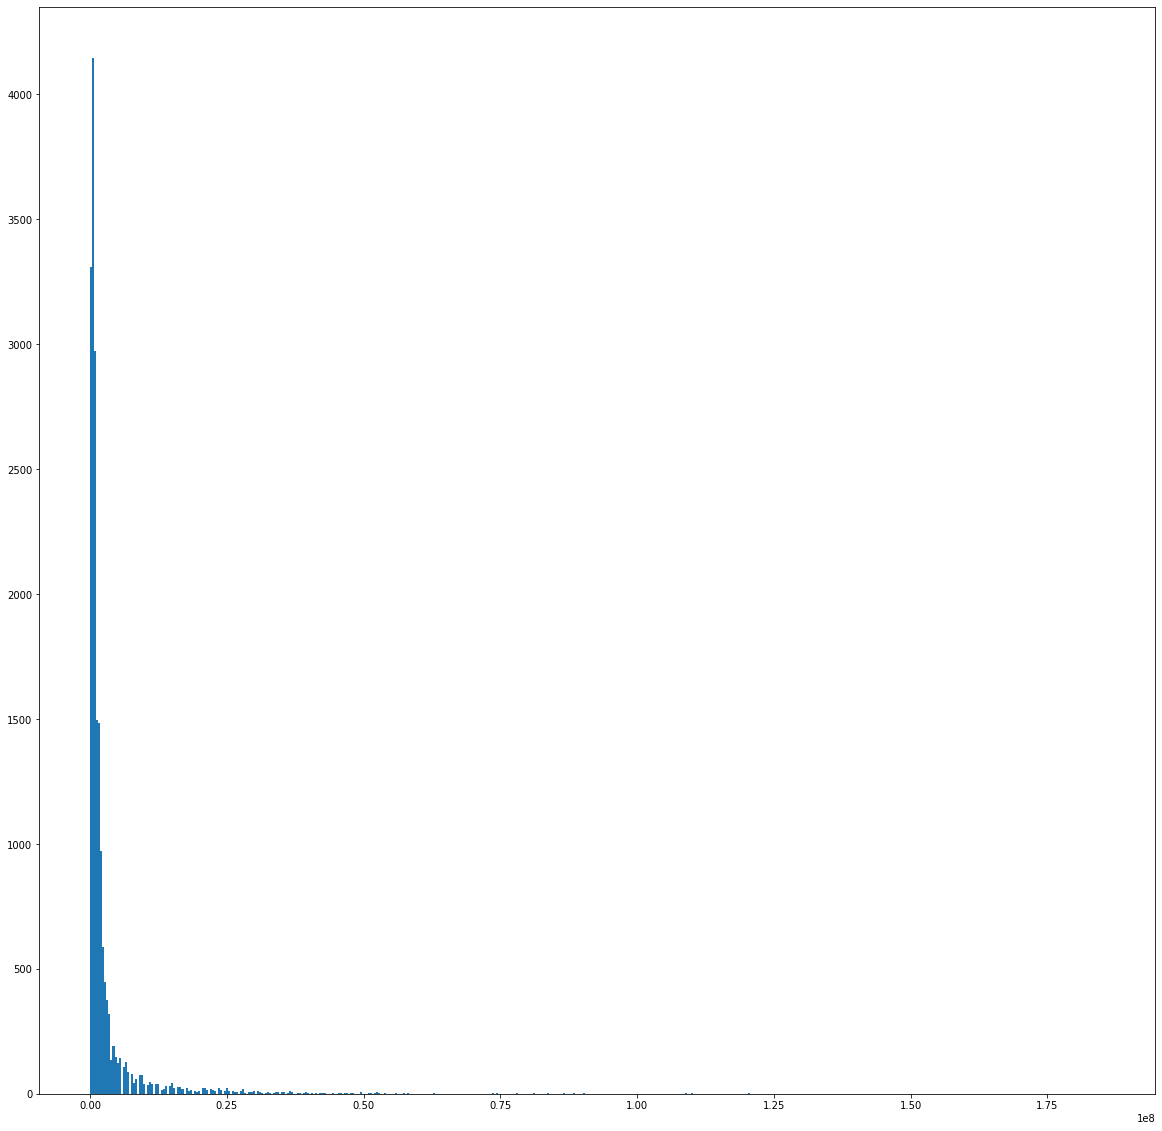

In [58]:
plt.figure(figsize=(20,20))
plt.hist(final_df["value"], bins=500)
plt.show()

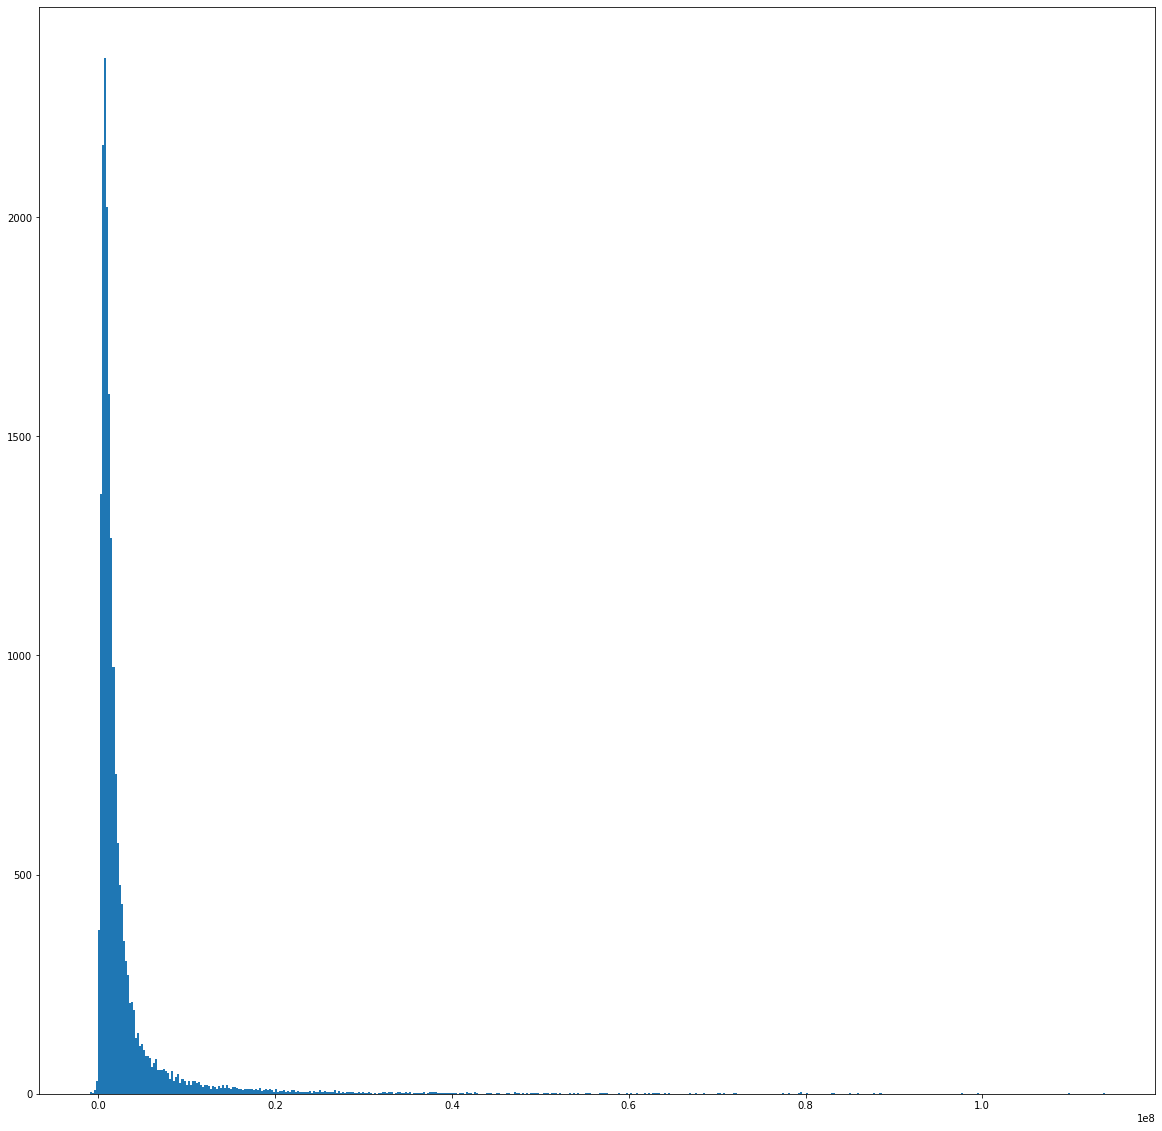

In [59]:
plt.figure(figsize=(20,20))
plt.hist(final_df["predicted_value"], bins=500)
plt.show()

In [136]:
pipeline.score(X_test.drop(columns=["short_name"]), y_test)

0.8939488705150009

In [170]:
-8.689771e+04

-86897.71

In [181]:
coefficients[coefficients["column"]=="club_LOSC Lille"]

column         coef     abs_coef
416  club_LOSC Lille  33721.30071  33721.30071

In [179]:
df[df["club"]=="LOSC Lille"]

short_name                      full_name  age dateOfBirth  height  \
227        M. Maignan                   Mike Maignan   25  1995-07-03     190   
481          B. André                 Benjamin André   30  1990-08-03     180   
531          J. Ikoné        Nanitamo Jonathan Ikoné   22  1998-05-02     175   
540    Renato Sanches      Renato Júnior Luz Sanches   23  1997-08-18     175   
561          J. Bamba                 Jonathan Bamba   24  1996-03-26     175   
676         B. Yılmaz                   Burak Yılmaz   35  1985-07-15     188   
710         Y. Yazıcı                   Yusuf Yazıcı   23  1997-01-29     185   
740          Z. Çelik              Mehmet Zeki Çelik   23  1997-02-17     180   
877        José Fonte     José Miguel da Rocha Fonte   37  1983-12-22     190   
905          J. David       Jonathan Christian David   21  2000-01-14     178   
1068         J. David       Jonathan Christian David   21  2000-01-14     178   
1278             Xeka    iguel Ângelo da Silva Rocha   26  1994-11-10     185   
1343      Luiz Araújo  Luiz de Araujo Guimarães Neto   24  1996-06-02     175   
1421       B. Soumaré              Boubakary Soumaré   21  1999-02-27     188   
1422      O. Karnezis               Orestis Karnezis   35  1985-07-11     190   
1528         Reinildo        Reinildo Isnard Mandava   27  1994-01-21     180   
1709      D. Bradarić               Domagoj Bradarić   21  1999-12-10     178   
2344        S. Botman                    Sven Botman   21  2000-01-12     193   
2811          J. Pied                    Jérémy Pied   31  1989-02-23     173   
4930          T. Weah                    imothy Weah   20  2000-02-22     183   
5262      Tiago Djaló     Tiago Emanuel Embaló Djaló   20  2000-04-09     190   
9350       I. Lihadji                  Isaac Lihadji   18  2002-04-10     178   
11137    H. Ouro-Sama                Hakim Ouro-Sama   23  1997-12-28     185   
12439       C. Niasse      heikh Ahmet Tidian Niasse   21  2000-01-19     188   
13321        A. Zekaj                    Arton Zekaj   20  2000-04-16     188   
14393    L. Chevalier                Lucas Chevalier   19  2001-11-06     193   
15708     I. Ouattara                Fadiga Ouattara   20  2001-01-18     183   
16018      E. Pizzuto           Eugenio Pizzuto Puga   18  2002-05-13     178   
16221         M. Kapı                    ustafa Kapı   18  2002-08-08     168   
16689    N. Innocenti               Nassim Innocenti   18  2002-02-19     188   

       weight            positions        club  contract_valid_until  \
227        91               ['GK']  LOSC Lille                  2022   
481        74        ['CDM', 'CM']  LOSC Lille                  2023   
531        73  ['RM', 'CAM', 'ST']  LOSC Lille                  2023   
540        70         ['CM', 'RM']  LOSC Lille                  2023   
561        70               ['LM']  LOSC Lille                  2023   
676        77               ['ST']  LOSC Lille                  2022   
710        74        ['CAM', 'RM']  LOSC Lille                  2024   
740        78               ['RB']  LOSC Lille                  2023   
877        84               ['CB']  LOSC Lille                  2021   
905        77        ['ST', 'CAM']  LOSC Lille                  2025   
1068       77        ['ST', 'CAM']  LOSC Lille                  2025   
1278       83        ['CDM', 'CM']  LOSC Lille                  2022   
1343       70         ['RM', 'LM']  LOSC Lille                  2022   
1421       82        ['CDM', 'CM']  LOSC Lille                  2022   
1422       81               ['GK']  LOSC Lille                  2023   
1528       73               ['LB']  LOSC Lille                  2022   
1709       69               ['LB']  LOSC Lille                  2024   
2344       81               ['CB']  LOSC Lille                  2025   
2811       73         ['RB', 'LB']  LOSC Lille                  2022   
4930       66         ['ST', 'LM']  LOSC Lille             